# Assignment 2: Classification
# Using Machine Learning Tools

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of classifying data from histological cell images for the diagnosis of malignant breast cancer. This will be presented as a practical scenario where you are approached by a client to solve a problem.  

The main aims of this assignment are:

- to use the best practice machine learning workflow for producing a solution to a client's problem;
- to visualise and clean data;
- to train and optimise a selection of models, then choose the best;
- to obtain an unbiased measurement of the final model's performance;
- to interpret results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task, but feel free to add additional cells to structure your notebook. Note that some questions require writing code, some require graphical results, and some require comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (**with the correct results displayed**) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code can run correctly on the original data file.

This assignment uses the standard best practice machine learning workflow, building on the first assignment and course workshops, and so less detailed instructions are provided for this assignment. You should be able to implement this workflow now without low-level guidance and a substantial portion of the marks for this assignment are associated with the appropriate choices and executing this workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), and [matplotlib](https://matplotlib.org/stable/index.html) as presented in the workshops. Other libraries should not be used (even though they might have nice functionality) and occasionally certain specific functions need to be used, which will be made clear in the instruction text. You are expected to make sure that you are using functions correctly, and you should search and carefully read the documentation if unsure.

# Scenario

A client approaches you to solve a machine learning problem for them.  They run a pathology lab that processes histological images for healthcare providers and they have created a product that measures most of the same features as in the *Wisconsin breast cancer data set* though using different acquisitions and processing methods. Their method employs efficient stochastic sampling, making it much faster than existing methods, although slightly noisier. This method does not measure any of the 'worst' features that appear in the *Wisconsin Breast Cancer Data Set*. They want to be able to diagnose *malignant* cancer (and distinguish them from *benign* growths) by employing machine learning techniques, and they have asked you to implement this for them.

Their requirements are:
 - 1) Have at least a 90% probability of detecting malignant cancer when it is present;
 - 2) Ensure that no more than 1 in 5 healthy cases (those with benign growths) result in a false positive (labeled as malignant).

They have hand-labelled 220 samples for you, with 20 features per sample, which is all they have at the moment.

Please follow the instructions below, which will vary in level of detail.

## 1. Load data, visualise it and identify erroneous values [30%]

 - Load the data from the csv file `assignment2_data_2024.csv` (found on MyUni).
 - Extract the feature names and label names for use later on.
 - Provide at least one text summary of the dataset. This should include key information and characteristics of the data.
 - Create one graphical plot per feature. Each plot must display the feature values for the two classes (malignant and benign) separately on a single axis/panel.
 - Make sure you clearly label the graphical plots with respect to feature names, axes, classes, etc.
 - Identify any erroneous values in the dataset during the data visualisation or summary steps. Determine and implement, here or later, the appropriate action to handle these values (e.g., removal, correction, or none).
 - Throughout this assignment, treat the _malignant_ cases as the _true positive_ class, following the standard convention in medicine.
.

In [5]:
# This code imports some libraries that you will need.
# You should not need to modify it, though you are expected to make other imports later in your code.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns

In [6]:
# Your code here

# Load the data
breast_data = pd.read_csv("assignment2_data_2024.csv")


In [7]:
# Check the data
breast_data

,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
0,malignant,15.494653829645529,15.902542,103.008265,776.437239,0.104239,0.168660,0.170572,0.085668,0.205053,...,0.653654,1.096678,4.962255,80.619370,0.006669,0.034950,0.043568,0.013765,0.024093,0.004928
1,malignant,16.229870799611437,18.785613,105.176755,874.712003,0.091843,0.092548,0.081681,0.053670,0.180435,...,0.445451,1.043931,3.005373,50.407958,0.006352,0.019998,0.025324,0.012172,0.018084,0.003582
2,malignant,16.34567074196476,20.114076,107.083804,872.563251,0.099924,0.123799,0.128788,0.078310,0.189756,...,0.549625,1.057447,3.643671,62.732851,0.006757,0.031325,0.034350,0.015150,0.021459,0.004066
3,maligant,13.001009157806651,19.876997,85.889775,541.281012,0.113423,0.173069,0.146214,0.069574,0.212078,...,0.430693,1.202955,3.051434,33.614356,0.007930,0.044881,0.042972,0.014556,0.035670,0.005981
4,malignant,16.416060073302194,17.397533,107.857386,891.516818,0.097321,0.111530,0.125971,0.068575,0.179562,...,0.525532,1.045900,3.747194,59.164555,0.008718,0.024231,0.039763,0.014202,0.019236,0.004115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,benign,13.618925155145831,17.270102,88.166812,593.279565,0.096065,0.094450,0.058880,0.036769,0.173312,...,0.313583,1.029905,2.217009,28.819166,0.006705,0.020034,0.023273,0.010344,0.017835,0.002852
216,benign,14.048463765049336,17.186671,90.974271,637.474225,0.094969,0.091549,0.063532,0.039494,0.173324,...,0.355219,1.068919,2.481640,33.861241,0.006128,0.020611,0.023855,0.010420,0.021327,0.003268
217,benign,12.879033083352171,16.767790,83.123369,539.225356,0.092146,0.083986,0.059347,0.035404,0.167690,...,0.314989,1.198787,2.230067,28.250520,0.005713,0.021280,0.024134,0.010947,0.024180,0.003778
218,benign,14.411990515442902,18.970674,93.423809,671.128126,0.086304,0.090118,0.070882,0.039482,0.175789,...,0.356964,1.030049,2.560170,35.435273,0.005784,0.022279,0.025244,0.009990,NaN,0.003255


In [8]:
# Extrate feature names and label names
print(f'Features names are: {breast_data.columns[1:].values}')
print(f'Label names are: {breast_data["label"].unique()}')

Features names are: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error']
Label names are: ['malignant' 'maligant' 'benign']


In [9]:
# Check the data types
breast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    220 non-null    object 
 1   mean radius              220 non-null    object 
 2   mean texture             220 non-null    float64
 3   mean perimeter           220 non-null    float64
 4   mean area                220 non-null    float64
 5   mean smoothness          220 non-null    float64
 6   mean compactness         220 non-null    float64
 7   mean concavity           220 non-null    float64
 8   mean concave points      220 non-null    float64
 9   mean symmetry            220 non-null    float64
 10  mean fractal dimension   220 non-null    float64
 11  radius error             220 non-null    float64
 12  texture error            220 non-null    float64
 13  perimeter error          220 non-null    float64
 14  area error               2

In [10]:
# Check for missing values
breast_data.isna().sum()

label                      0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             1
fractal dimension error    0
dtype: int64

In [11]:
# Finding the potential erroneous data
breast_data.describe()

,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,219.000000,220.000000
mean,18.991963,89.866240,620.956227,0.096480,0.102879,0.085281,0.046867,0.181850,0.103957,0.393337,1.217593,2.775090,37.781034,0.007076,0.025514,0.031901,0.011762,0.020901,0.003873
std,1.427635,7.366180,106.419871,0.004961,0.019819,0.026911,0.012548,0.010816,0.606979,0.075828,0.210182,0.579317,9.988655,0.001043,0.007345,0.014102,0.002422,0.003250,0.001259
min,15.349270,74.690886,-2.645499,0.084651,0.075184,0.050771,0.028701,0.157059,0.058922,0.298005,0.898026,2.059186,27.693748,0.004994,0.016907,0.018730,0.007253,0.016181,0.002631
25%,17.914319,84.911981,558.731832,0.092797,0.089531,0.066525,0.038106,0.174944,0.061139,0.343114,1.073344,2.394331,31.843894,0.006372,0.020530,0.025373,0.010336,0.018658,0.003225
50%,18.928256,88.587737,603.806128,0.096457,0.098517,0.075748,0.042761,0.180953,0.062557,0.367863,1.165727,2.610732,34.007608,0.006837,0.023147,0.028835,0.011357,0.020193,0.003555
75%,19.995859,93.066393,655.690435,0.099817,0.113276,0.098826,0.055337,0.186354,0.064184,0.420514,1.300769,3.003888,39.042484,0.007675,0.027733,0.033620,0.012669,0.022195,0.004046
max,24.430831,121.247839,1103.740620,0.113423,0.192880,0.201971,0.100467,0.226448,9.065897,0.712896,2.561348,5.903661,80.619370,0.011088,0.054950,0.163592,0.026554,0.041861,0.013251


In [12]:
# Data cleaning
breast_data_cleaned = breast_data.copy() # Make a copy of the data
breast_data_cleaned = breast_data_cleaned.fillna(np.nan) # filling missing values with nan 
breast_data_cleaned['label']= breast_data_cleaned['label'].replace('maligant', 'malignant') # Fix the typo
breast_data_cleaned['mean area'] = breast_data_cleaned['mean area'].replace(-2.6454990922517, np.nan) # Fix the number less than 0
breast_data_cleaned['mean radius'] = breast_data_cleaned['mean radius'].replace('n12.254518716420597',np.nan) 
breast_data_cleaned['mean fractal dimension'] = breast_data_cleaned['mean fractal dimension'].apply(lambda x: np.nan if x >1 else x) # Fix the number greater than 1
breast_data_cleaned['mean radius'] = breast_data_cleaned['mean radius'].astype(float) # Convert the mean_radius to float
breast_data_cleaned['mean radius'] = breast_data_cleaned['mean radius'].apply(lambda x: np.nan if x <0 else x)  # Fix the number less than 0

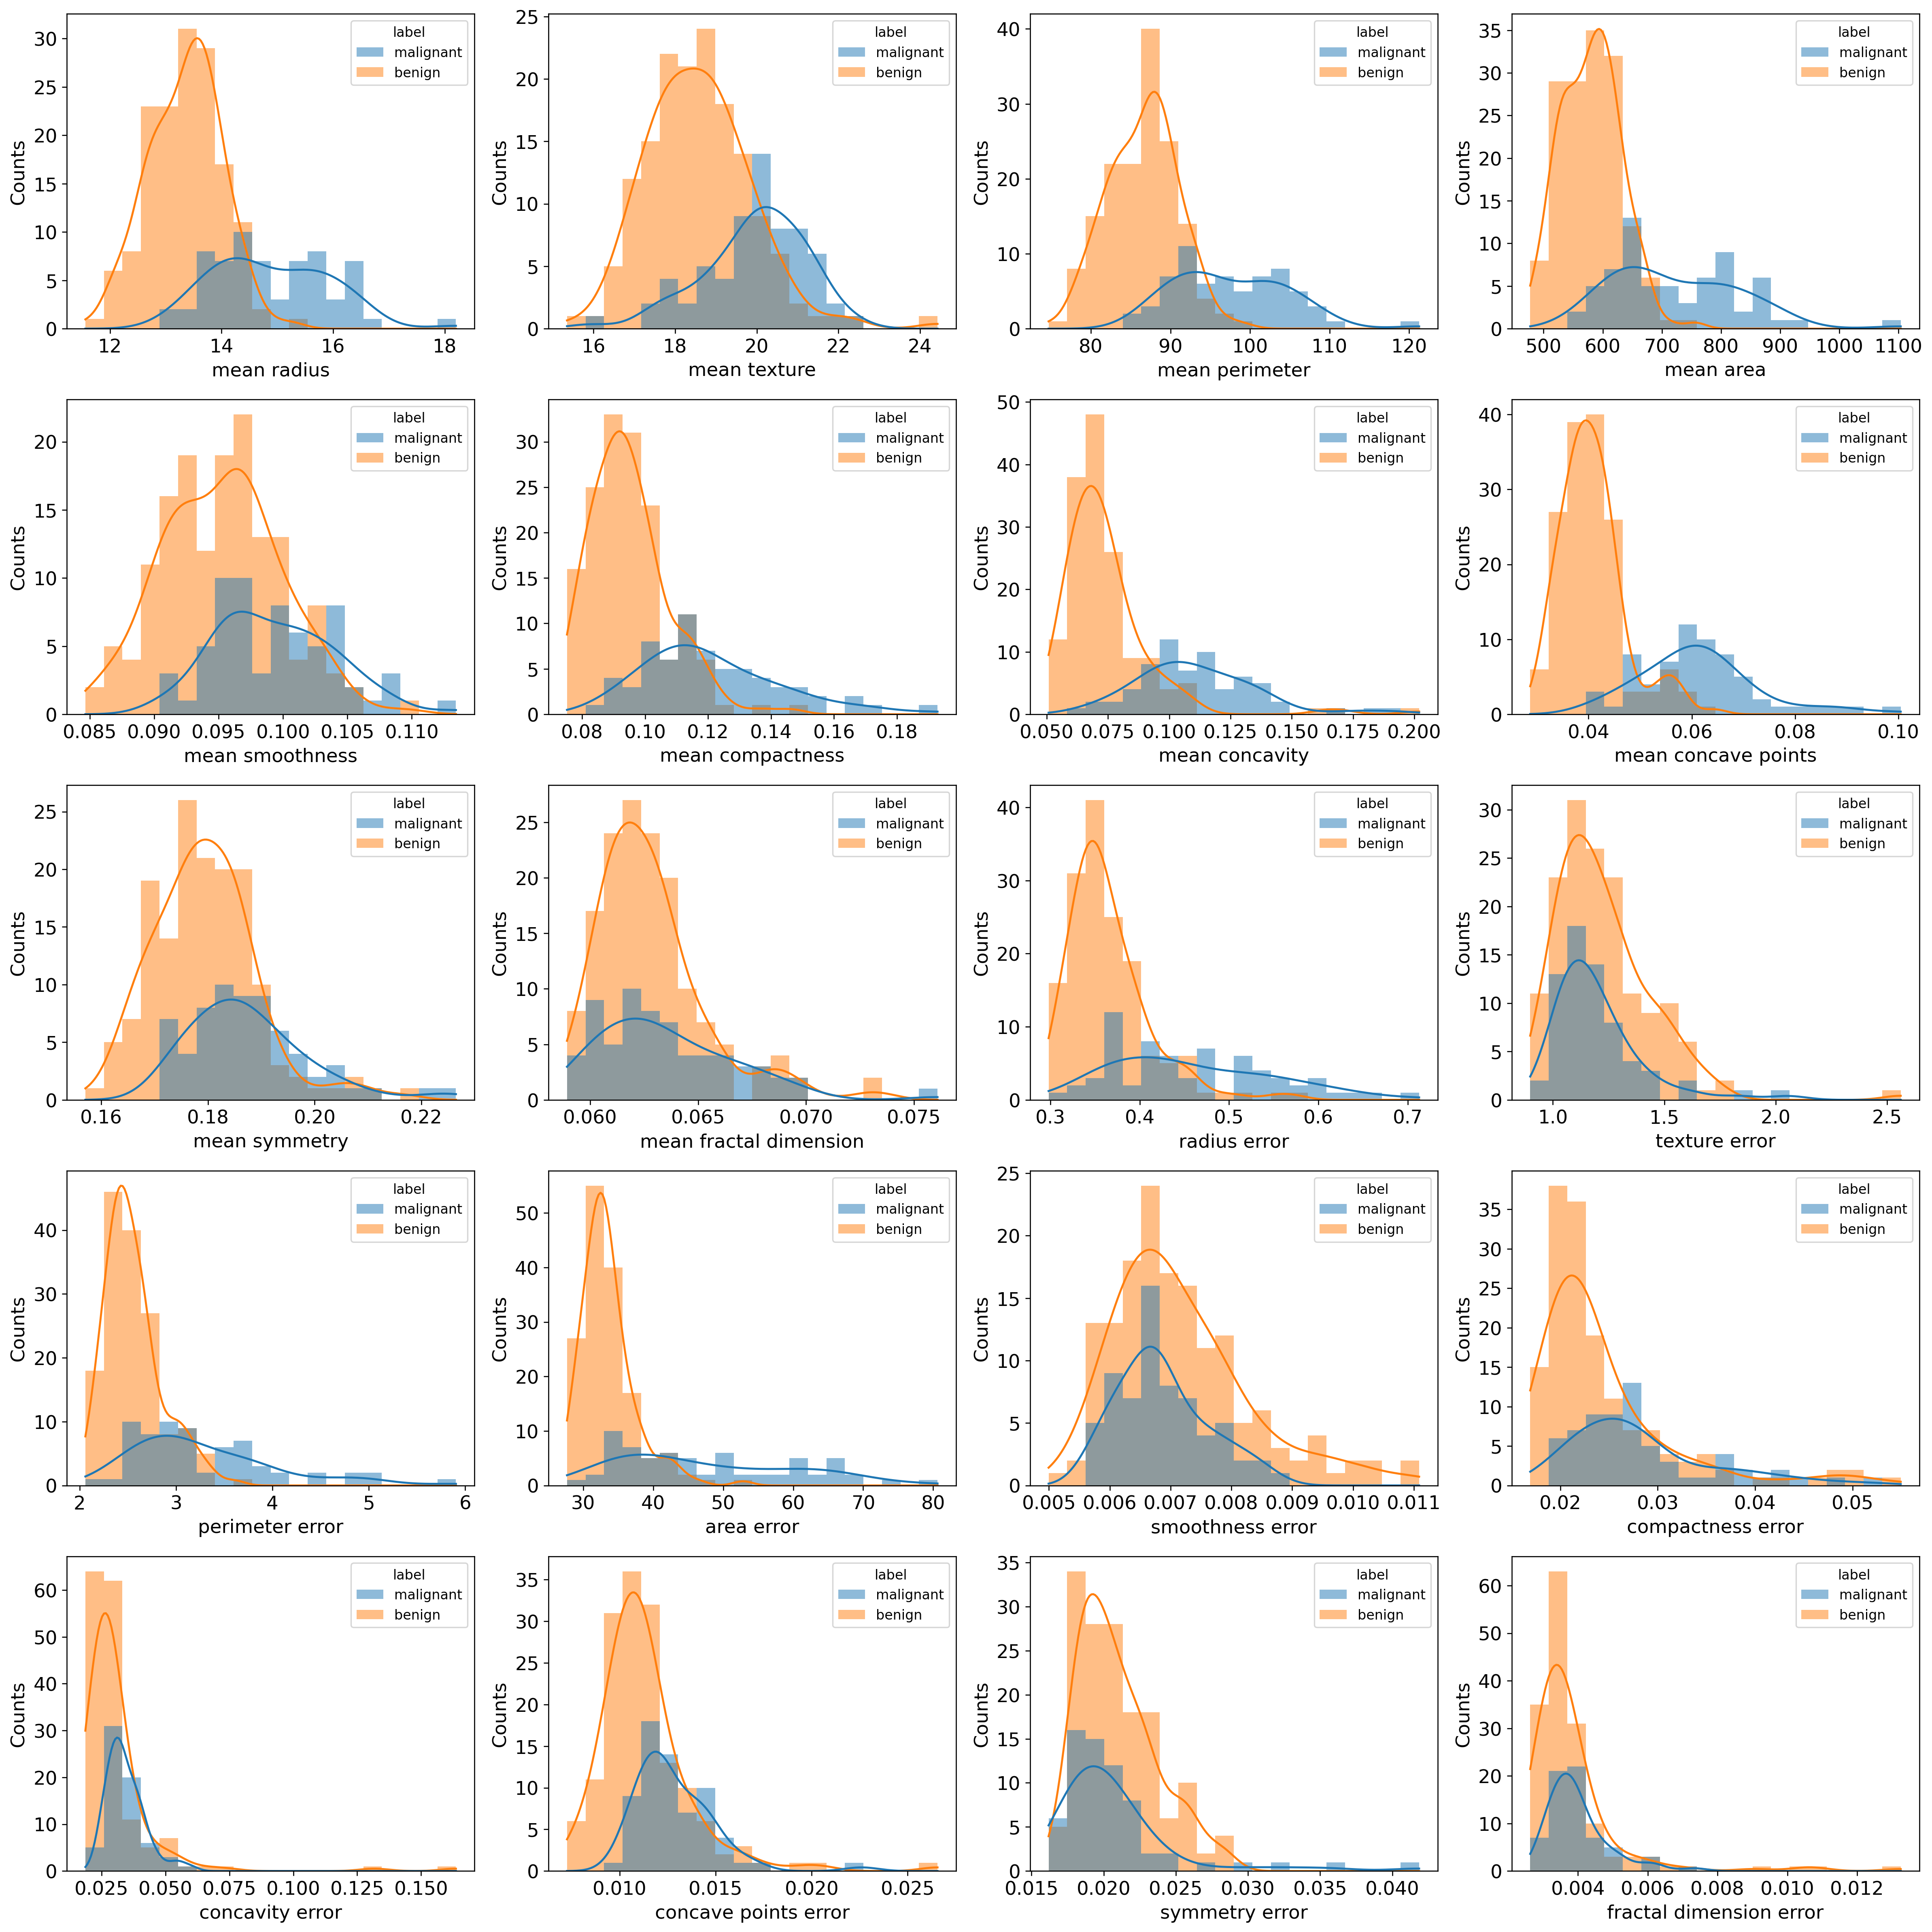

In [13]:
# Visualize the data using histograms
fig, axes = plt.subplots(5, 4, figsize = (20, 20))
feature_names = breast_data_cleaned.columns.drop('label')
for i, feature in enumerate(feature_names):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.histplot(data = breast_data_cleaned, x = feature, hue = "label", bins = 20, kde = True, ax = ax, edgecolor = None)
    ax.set_xlabel(feature, fontsize=14)  
    ax.set_ylabel('Counts', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
plt.show()

## 2. Prepare data and models, and make baseline measurements [20%]
 - Split data into appropriate sets using the `stratify` option to obtain consistent proportions of classes in each set.
 - Decide on appropriate pre-processing steps for the data.
 - Implement a _very_ simple baseline model that makes purely random predictions of the class.
 - Measure the baseline performance with the following metrics:
   - accuracy
   - balanced accuracy: accounts for imblanaced datasets, defined as _(sensitivity + specificity)/2_
   - recall
   - precision
   - auc
   - f1score
   - fbeta_scores with beta=0.1
   - fbeta_score with beta=10
 - Also display a confusion matrix for the baseline predictions.
 - As a second baseline, implement an SGD classifier and fit it once (without hyper-parameter optimisation) and then display the same performance metrics and a confusion matrix for its results.

In [14]:
# Some helpful code that you can use if you wish (or not)

from sklearn.metrics import fbeta_score, make_scorer

f10_scorer = make_scorer(fbeta_score, beta=10)
f01_scorer = make_scorer(fbeta_score, beta=0.1)

def f10_score(yt,yp):
    return fbeta_score(yt, yp, beta=10)

def f01_score(yt,yp):
    return fbeta_score(yt, yp, beta=0.1)

In [15]:
# Your code here


# Convert the label to binary
breast_data_cleaned['label'] = breast_data_cleaned['label'].map ({'benign': 0, 'malignant': 1}) 

# Split the data into traing, validation and test sets (60:20:20)
from sklearn.model_selection import train_test_split
X = breast_data_cleaned.drop('label', axis=1)  
y = breast_data_cleaned['label']
X_big_train, X_test, y_big_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_big_train, y_big_train, test_size=0.25,random_state=42, stratify=y_big_train) 


In [16]:
# Create a pre-processing pipeline
from sklearn.impute import SimpleImputer
pipe_prepro = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])

In [17]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Create a simple baseline using random number
np.random.seed(42)
y_val_random = np.random.randint(2, size=len(y_val))

# Calculate the performance of the baseline
accuracy = accuracy_score(y_val, y_val_random)
recall = recall_score(y_val, y_val_random)
precision = precision_score(y_val, y_val_random)
auc = roc_auc_score(y_val, y_val_random)
f1 = f1_score(y_val, y_val_random)
fbeta_01 = fbeta_score(y_val, y_val_random, beta=0.1)
fbeta_10 = fbeta_score(y_val, y_val_random, beta=10)

print(f'Accuracy of baseline: {accuracy}')
print(f'Recall of baseline: {recall}')
print(f'Precision of baseline: {precision}')
print(f'AUC of baseline: {auc}')
print(f'F1 Score of baseline: {f1}')
print(f'Fbeta Score (beta=0.1) of baseline: {fbeta_01}')
print(f'Fbeta Score (beta=10) of baseline: {fbeta_10}')


Accuracy of baseline: 0.5227272727272727
Recall of baseline: 0.5384615384615384
Precision of baseline: 0.3181818181818182
AUC of baseline: 0.5272952853598014
F1 Score of baseline: 0.39999999999999997
Fbeta Score (beta=0.1) of baseline: 0.3194758246723904
Fbeta Score (beta=10) of baseline: 0.5347957639939486


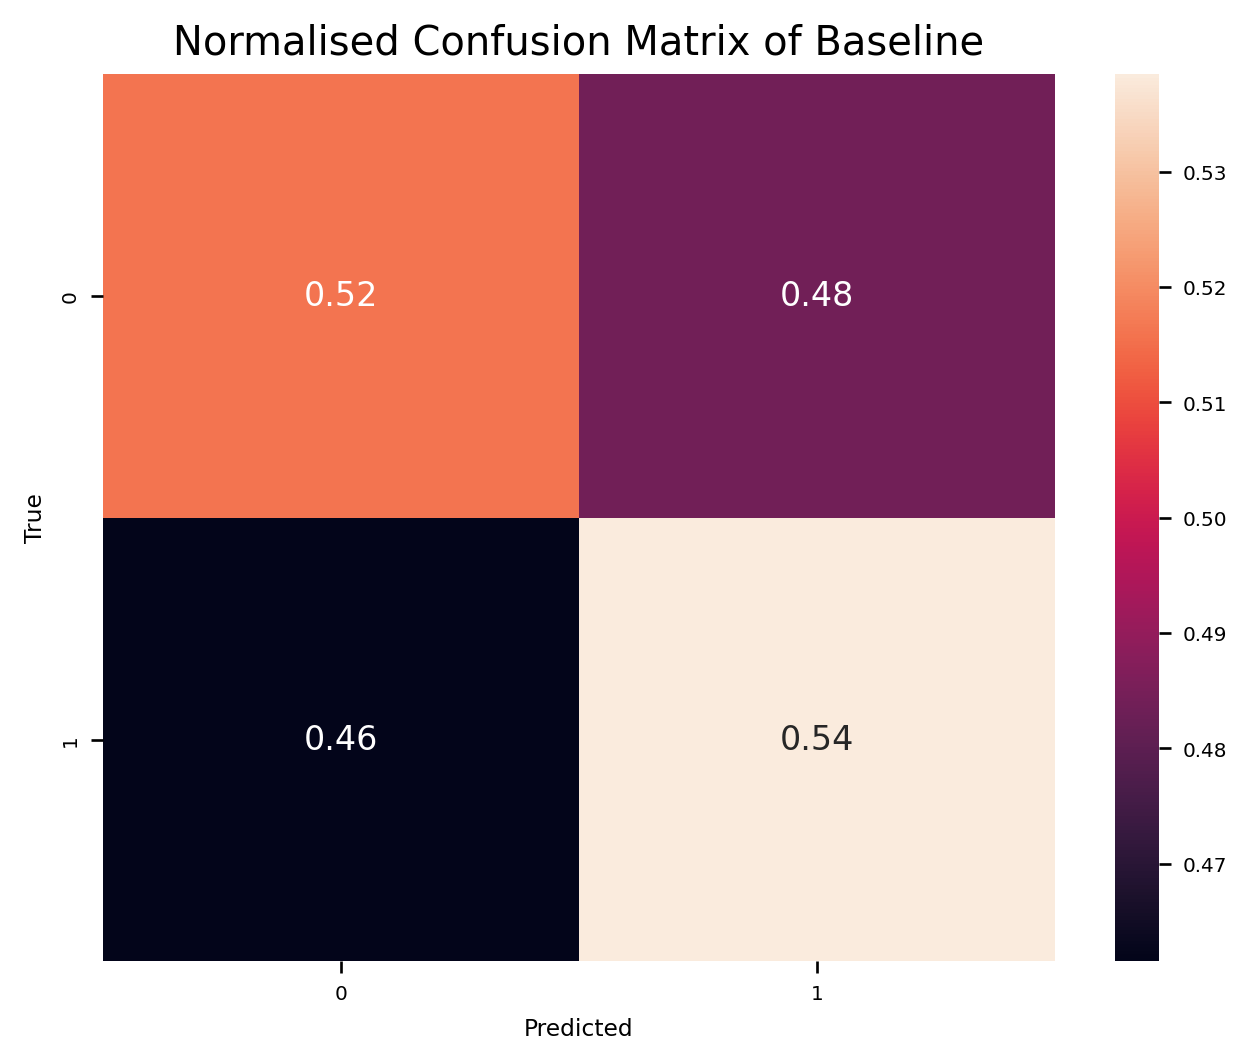

In [18]:
# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_random,normalize='true')
sns.heatmap(conf_matrix,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalised Confusion Matrix of Baseline')
plt.show()

In [19]:
# Create a second baseline using SGD classifier
from sklearn.linear_model import SGDClassifier

sgd_pipe = Pipeline([('preprocessor', pipe_prepro), ('sgd', SGDClassifier(random_state=42))])

In [20]:
sgd_pipe.fit(X_train, y_train)
y_val_sgd = sgd_pipe.predict(X_val)



# Calculate the performance of the second baseline
accuracy = accuracy_score(y_val, y_val_sgd)
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy = balanced_accuracy_score(y_val, y_val_sgd) # Calculate the balanced accuracy

recall = recall_score(y_val, y_val_sgd)
precision = precision_score(y_val, y_val_sgd)
auc = roc_auc_score(y_val, y_val_sgd)
f1 = f1_score(y_val, y_val_sgd)
fbeta_01 = fbeta_score(y_val, y_val_sgd, beta=0.1)
fbeta_10 = fbeta_score(y_val, y_val_sgd, beta=10)

print(f'Accuracy of baseline using SGD: {accuracy}')
print(f'Balanced Accuracy of baseline using SGD: {balanced_accuracy}')
print(f'Recall of baseline using SGD: {recall}')
print(f'Precision of baseline using SGD: {precision}')
print(f'AUC of baseline using SGD: {auc}')
print(f'F1 Score of baseline using SGD: {f1}')
print(f'Fbeta Score (beta=0.1) of baseline using SGD: {fbeta_01}')
print(f'Fbeta Score (beta=10) of baseline using SGD: {fbeta_10}')


Accuracy of baseline using SGD: 0.8863636363636364
Balanced Accuracy of baseline using SGD: 0.8746898263027295
Recall of baseline using SGD: 0.8461538461538461
Precision of baseline using SGD: 0.7857142857142857
AUC of baseline using SGD: 0.8746898263027295
F1 Score of baseline using SGD: 0.8148148148148148
Fbeta Score (beta=0.1) of baseline using SGD: 0.7862703467799008
Fbeta Score (beta=10) of baseline using SGD: 0.8455098934550991


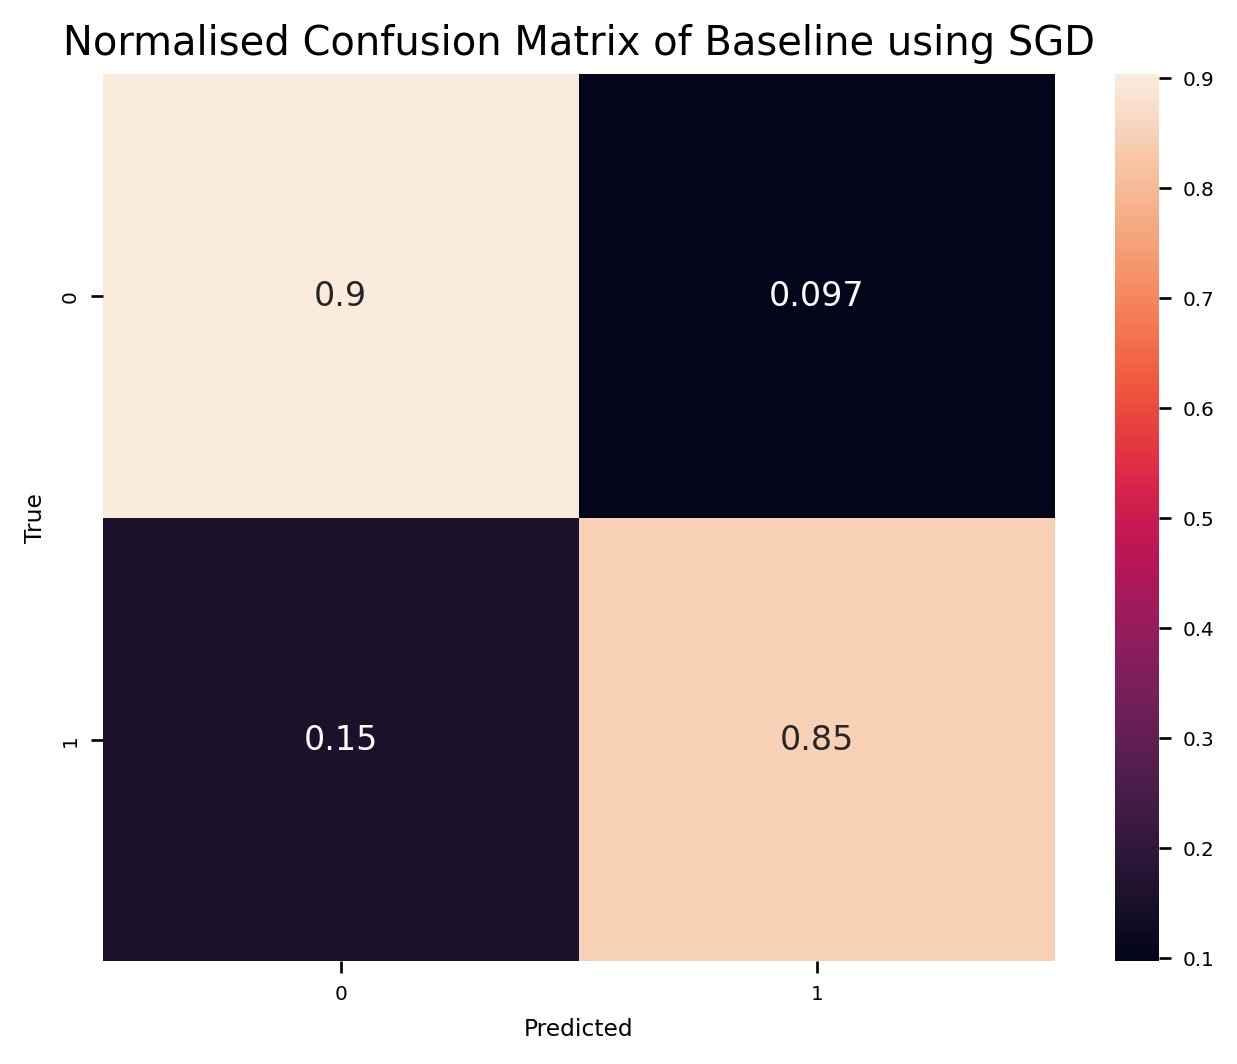

In [21]:
# Confusion matrix
conf_matrix_sgd = confusion_matrix(y_val, y_val_sgd,normalize='true')
sns.heatmap(conf_matrix_sgd,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalised Confusion Matrix of Baseline using SGD')
plt.show()

## 3. Model Optimisation [40%]

### 3.1 Performance metric
Choose one performance metric from the above set. State your choice and explain why you chose it. [50 words maximum]

In [22]:
# Check whether the data is balanced
breast_data_cleaned['label'].value_counts()

label
0    154
1     66
Name: count, dtype: int64

In [23]:
# Answer here
# We will choose AUC score because:
# 1. AUC is a single measure to compare classifiers, and it is useful for unbanlanced data.
# 2. The client requires a high True Positive Rate (recall>=90%) and a low False Positive Rate (FPR<=20%), which are the key components of AUC.


### 3.2 Hyper-parameter optimisation
 - Perform a hyper-parameter optimisation (using appropriate methods) on three models:
   - SGD Classifer
   - SVM
   - One other model of your choice
 - Display the results of each model (including confusion matrices) and choose the best model.
 - Choose the best model and display the final results of this model.

In [194]:
# Your code here

# The model we choose is decision tree
from sklearn.tree import DecisionTreeClassifier
# Hyper-arameters for three models

sgd_params = {
    'sgd__alpha': [0.5, 0.6,0.8,0.9,1, 10],
    'sgd__loss': ['hinge', 'log_loss', 'perceptron'],
    'sgd__penalty': ['l2','l1','elasticnet'],
    'sgd__learning_rate': ['constant','optimal', 'invscaling', 'adaptive'],
    'sgd__eta0': [0.01, 0.1, 1],
    'sgd__early_stopping': [True, False]

}
#
svm_params = {
    'svm__C': [1,2,5,8,8.5,9],
    'svm__kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'svm__gamma': ['scale', 'auto',0.01,0.05],
    'svm__coef0': [0.01,0.5,20,50],
    'svm__degree': [2, 3]
}


decision_tree_params = {
    'dt__max_depth': [None, 10, 20, 30],
    'dt__min_samples_split': [2,3,4,5,10],
    'dt__min_samples_leaf': [1,2,3,5,10],
    'dt__criterion': ['gini', 'entropy']
}



In [195]:
from sklearn.model_selection import StratifiedKFold
# Create pipelines for models
sgd_pipe = Pipeline([('preprocessor', pipe_prepro), ('sgd', SGDClassifier(random_state=42))])
svm_pipe = Pipeline([('preprocessor', pipe_prepro), ('svm', svm.SVC(random_state=42))])
dt_pipe = Pipeline([('preprocessor', pipe_prepro), ('dt', DecisionTreeClassifier(random_state=42))])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Grid search for hyper-parameters

sgd_classifier = GridSearchCV(sgd_pipe, sgd_params, cv=cv, scoring='roc_auc')
sgd_classifier.fit(X_train, y_train)

svm_classifier = GridSearchCV(svm_pipe, svm_params, cv=cv, scoring='roc_auc')
svm_classifier.fit(X_train, y_train)

dt_classifier = GridSearchCV(dt_pipe, decision_tree_params, cv=cv, scoring='roc_auc')
dt_classifier.fit(X_train, y_train)

# Print the results
print(f"\nSGD classifier: \nthe best score is {sgd_classifier.best_score_} for best params of {sgd_classifier.best_params_}.") 
print(f"\nSVM classifier: \nthe best score is {svm_classifier.best_score_} for best params of {svm_classifier.best_params_}.")  
print(f"\nDecision Tree classifier: \nthe best score is {dt_classifier.best_score_} for best params of {dt_classifier.best_params_}.")   


SGD classifier: 
the best score is 0.9972222222222221 for best params of {'sgd__alpha': 0.5, 'sgd__early_stopping': True, 'sgd__eta0': 0.01, 'sgd__learning_rate': 'adaptive', 'sgd__loss': 'perceptron', 'sgd__penalty': 'l2'}.

SVM classifier: 
the best score is 0.9958333333333333 for best params of {'svm__C': 1, 'svm__coef0': 20, 'svm__degree': 2, 'svm__gamma': 0.01, 'svm__kernel': 'poly'}.

Decision Tree classifier: 
the best score is 0.9413742690058479 for best params of {'dt__criterion': 'gini', 'dt__max_depth': None, 'dt__min_samples_leaf': 10, 'dt__min_samples_split': 2}.


Text(0.5, 1.0, 'Normalised Confusion Matrix of SGD Classifier')

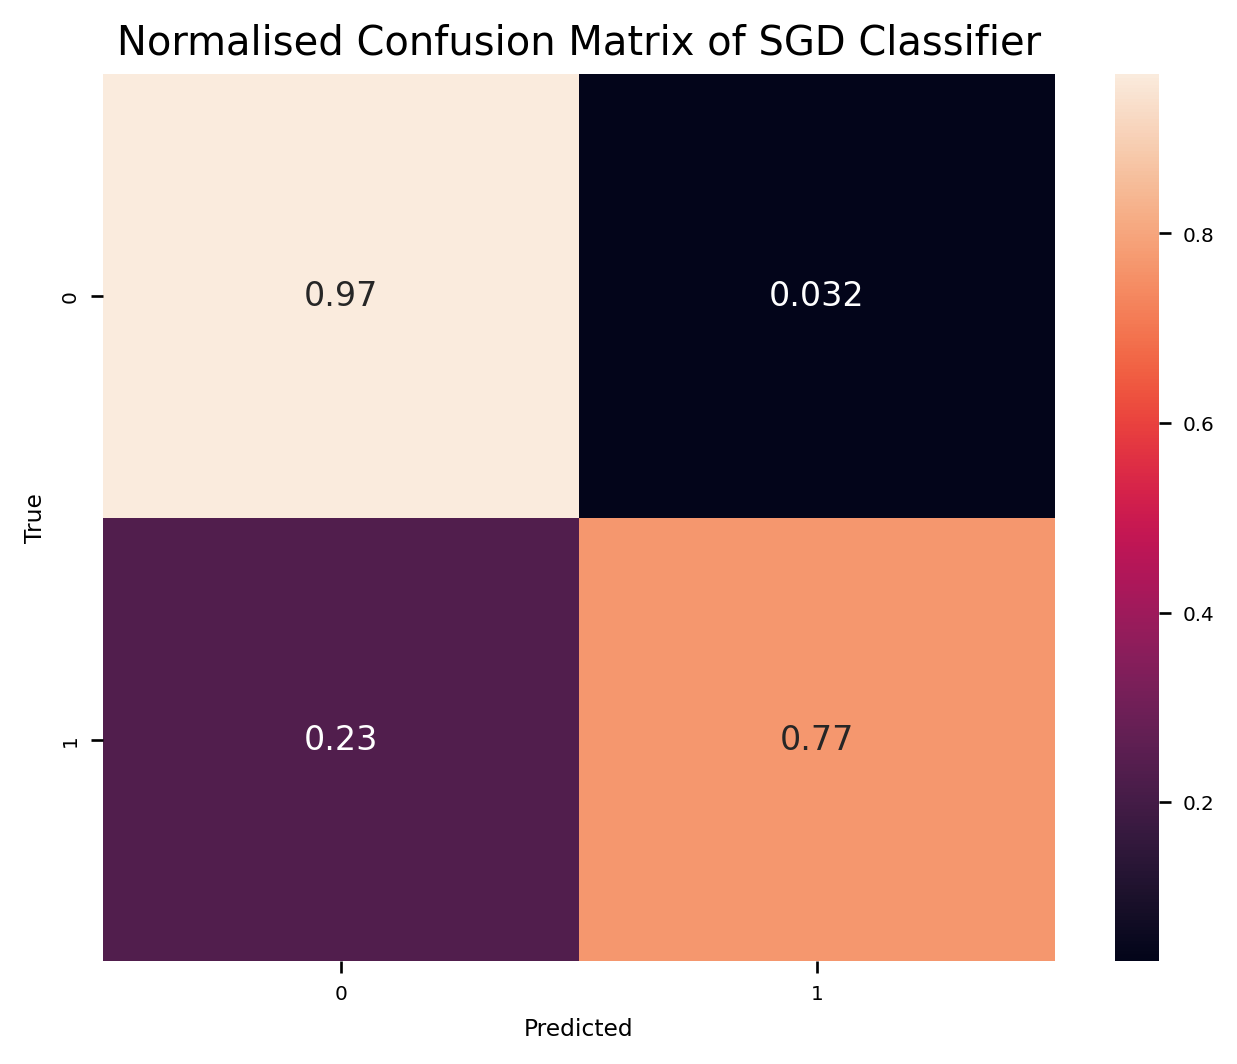

In [184]:
# Display the confusion metric of each model on the validation set
sgd_classifier_best = sgd_classifier.best_estimator_
y_val_sgd = sgd_classifier_best.predict(X_val)
conf_matrix_sgd = confusion_matrix(y_val, y_val_sgd,normalize='true')
sns.heatmap(conf_matrix_sgd,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalised Confusion Matrix of SGD Classifier')

Text(0.5, 1.0, 'Normalised Confusion Matrix of SVM Classifier')

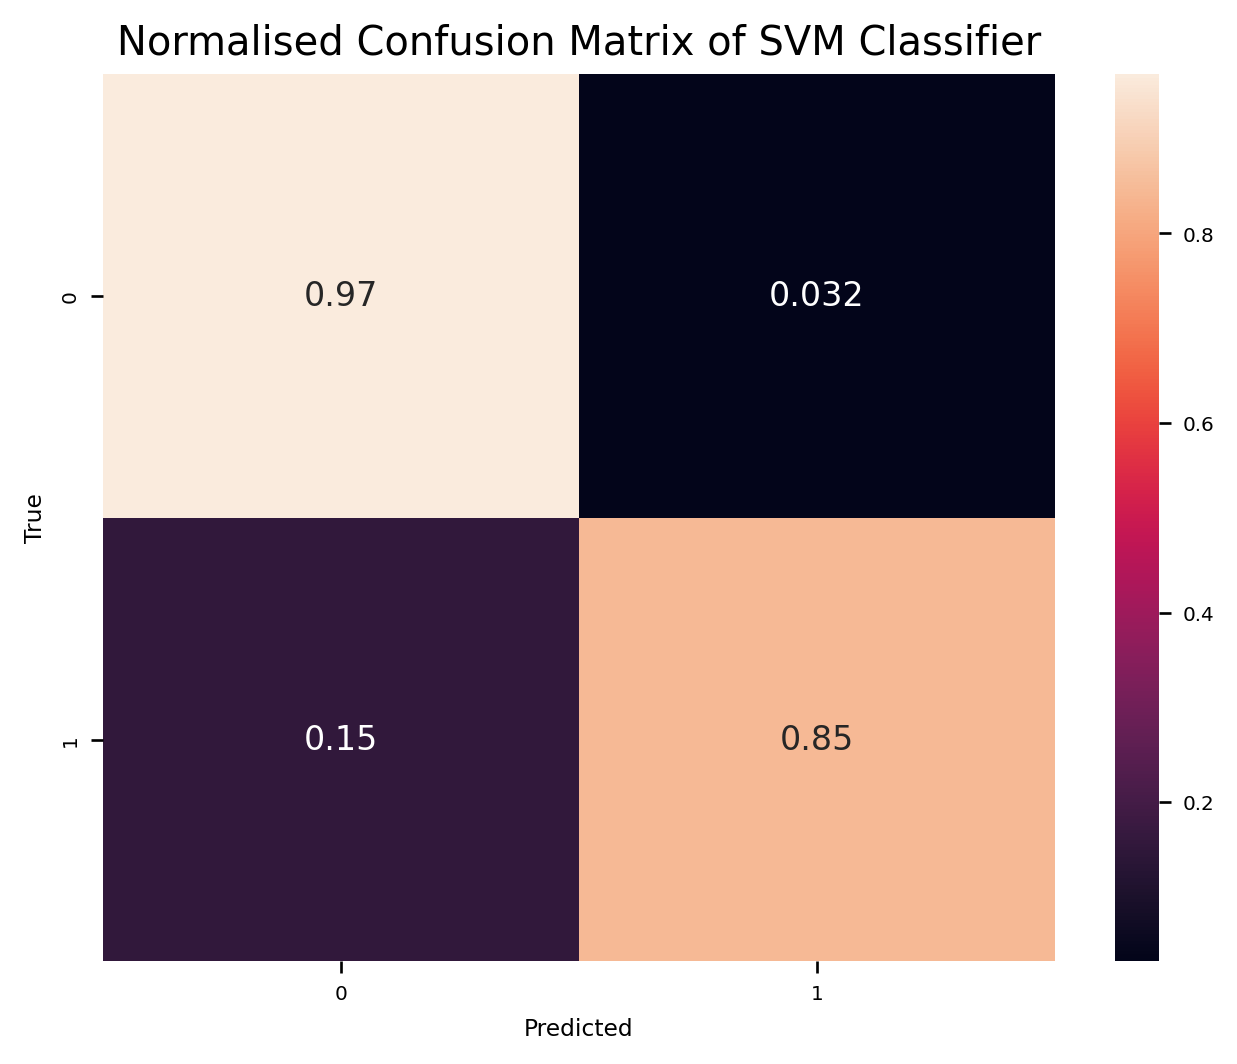

In [196]:
svm_classifier_best = svm_classifier.best_estimator_
y_val_svm = svm_classifier_best.predict(X_val)
conf_matrix_svm = confusion_matrix(y_val, y_val_svm,normalize='true')
sns.heatmap(conf_matrix_svm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalised Confusion Matrix of SVM Classifier')

Text(0.5, 1.0, 'Normalised Confusion Matrix of Decision Tree Classifier')

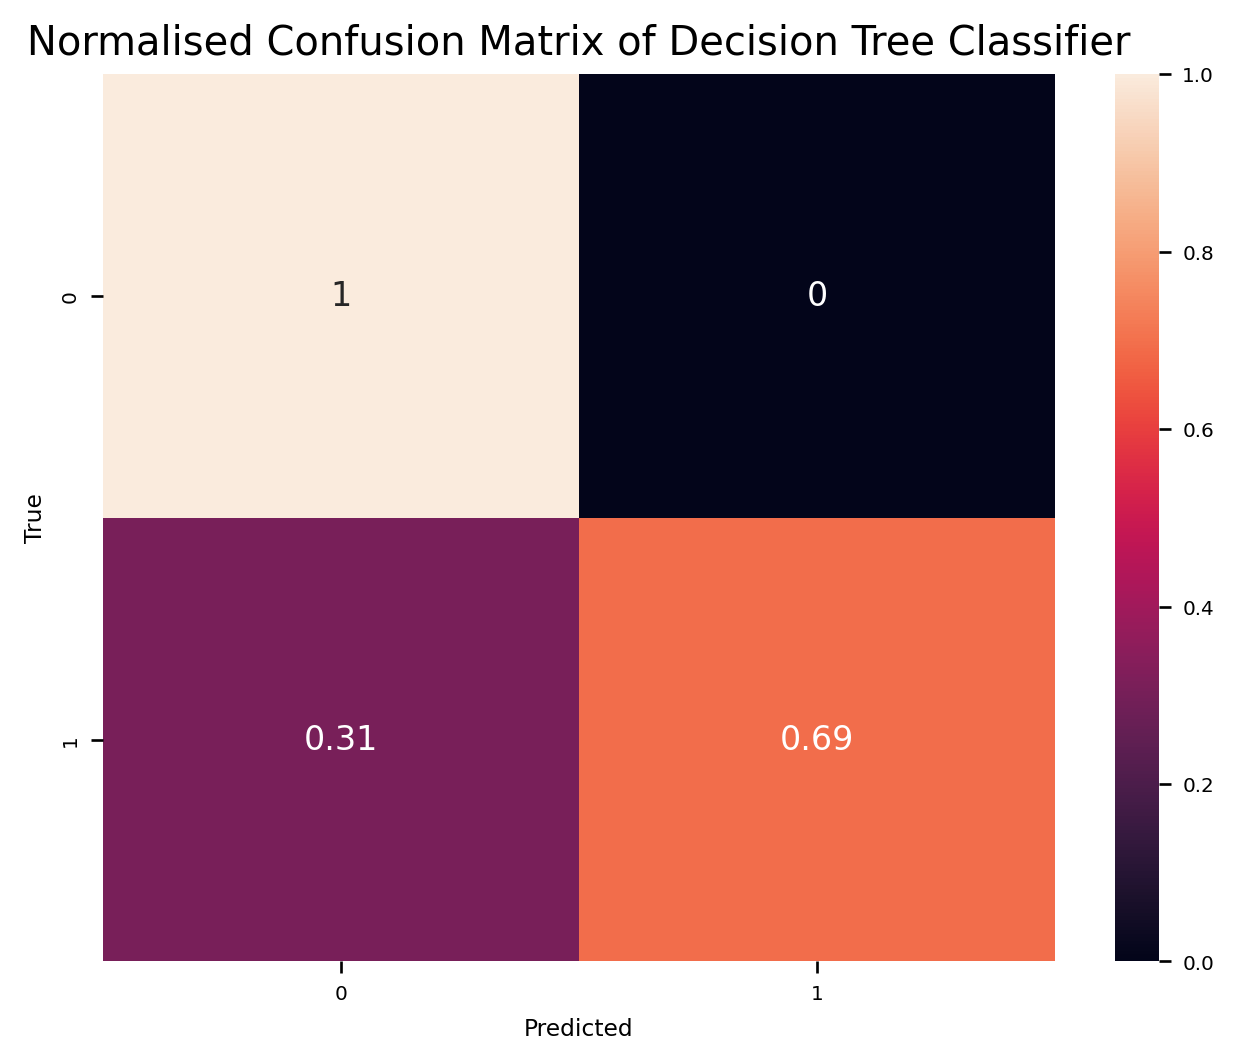

In [186]:

dt_classifier_best = dt_classifier.best_estimator_
y_val_dt = dt_classifier_best.predict(X_val)
conf_matrix_dt = confusion_matrix(y_val, y_val_dt,normalize='true')
sns.heatmap(conf_matrix_dt,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalised Confusion Matrix of Decision Tree Classifier')

In [197]:
# Choose the best model based on AUC score for the validation set
auc_sgd = roc_auc_score(y_val, y_val_sgd)
auc_svm = roc_auc_score(y_val, y_val_svm)
auc_dt = roc_auc_score(y_val, y_val_dt)
print(f'Comparison based on AUC on validation set is {auc_sgd} vs {auc_svm} vs {auc_dt} for SGD vs SVM vs Decision Tree')

Comparison based on AUC on validation set is 0.8684863523573201 vs 0.9069478908188586 vs 0.8461538461538461 for SGD vs SVM vs Decision Tree


In [ ]:
# The best model is SVM classifier 
# Because the SVM classifier has the best AUC score on validation set, it also has the highest recall, and false positive rate is within the acceptable range.

In [200]:
# Display final result (AUC) for the validation set

auc = roc_auc_score(y_val, y_val_svm)
print(f'Final result on validation set based on the best model is: AUC = {auc}')

Final result on validation set based on the best model is: AUC = 0.9069478908188586


### 3.3 Final results

From the final results calculate the _probability_ that a sample from a person with a malignant tumour is given a result that they do not have cancer.

Text(0.5, 1.0, 'Normalised Confusion Matrix of SVM Classifier for validation set')

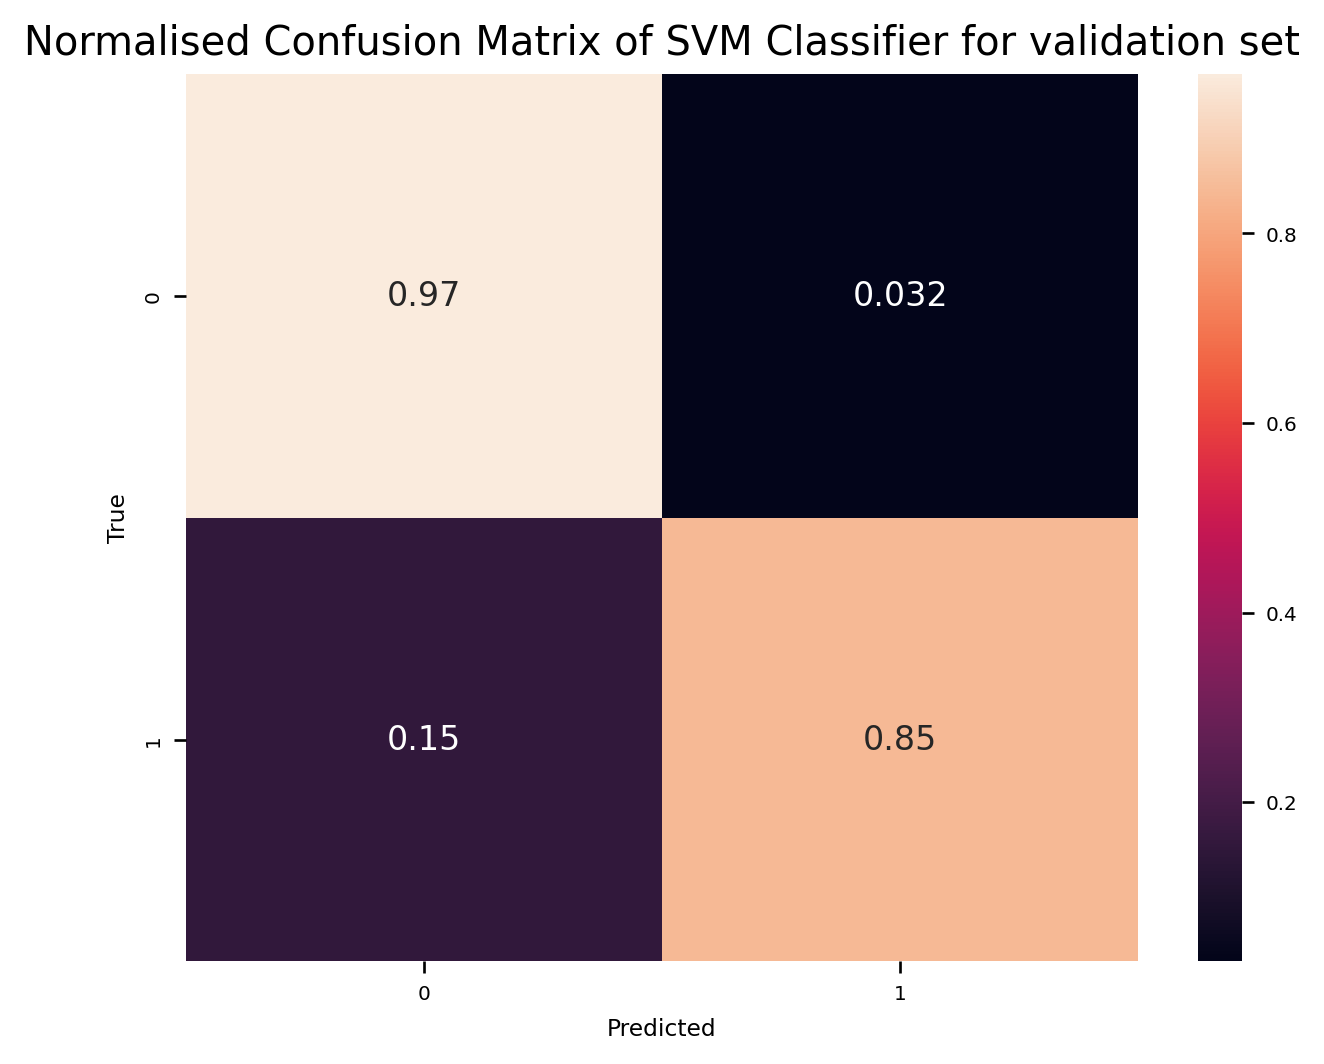

In [199]:
# Answer here

# The question reuires us to caculate the false negative rate.
conf_matrix_svm = confusion_matrix(y_val, y_val_svm,normalize='true')
sns.heatmap(conf_matrix_svm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalised Confusion Matrix of SVM Classifier for validation set')

# We can see from the confusion matrix that the false negative rate is 0.15, which is the left bottom of the matrix.

## 4. Decision Boundaries [10%]
 - To finish up, the client wants a visualisation of how the final model is working and your line manager has asked you to show some of the decision boundaries.
 - The client also wants to know if your method has met their performance specifications.
 - Follow the next three steps (4.1, 4.2 and 4.3) to do these things.

### 4.1 Discriminative features

Although it is only possible to know the true usefulness of a feature when you've combined it with others in a machine learning method, it is still helpful to have some measure for how discriminative each feature is on its own.  One common method for doing this is to calculate a T-score (often used in statistics, and in the LDA machine learning method) for each feature.  

The formula for the T-score is:

_(mean(x2) - mean(x1))/(0.5*(stddev(x2) + stddev(x1)))_

where x1 and x2 are the feature values corresponding to the two classes. Large values for the T-score (either positive or negative) indicate discriminative ability.

**Calculate the T-score for each feature and print out the best 4 features according to this score.**

In [171]:
# Your code here

# Using training data to calculate the T-score
feature_names = X_train.columns.tolist()
breast_data_cleaned_tranform = pipe_prepro.fit_transform(X_train)

breast_data_transformed = pd.DataFrame(breast_data_cleaned_tranform, columns=feature_names)
breast_data_transformed['label'] = y_train.reset_index(drop=True) 

class_benign = breast_data_transformed[breast_data_transformed["label"] == 0]
class_malignant = breast_data_transformed[breast_data_transformed["label"] == 1]

t_scores = {}

for feature in breast_data_transformed.columns[1:]:
    x1 = class_benign[feature]
    x2 = class_malignant[feature]
    std_combined = (0.5 * (np.std(x2) + np.std(x1)))
    if std_combined == 0:
        t_score = np.nan  # Assign NaN if variance is zero
    else:
        t_score = (np.mean(x2) - np.mean(x1)) / std_combined

    t_scores[feature] = t_score

scores_sorted = sorted(t_scores, key = t_scores.get, reverse = True)

print(f"The best 4 features according to the T-score:")
for feature in scores_sorted[:4]:
    print(f"{feature}: {t_scores[feature]}")

The best 4 features according to the T-score:
mean concave points: 2.5657858735393266
mean concavity: 2.2342040268433028
mean perimeter: 1.9526805484290142
mean area: 1.8203856286487856


### 4.2 Visualise decision boundaries

**Display the decision boundaries** for each pair of features from the best 4 chosen above.  You can use the functions below to help if you like.

Instead of using the simple mean as the input for `xmean` in `plot_contours`, use the following:

_0.5*(mean(x1) + mean(x2))_

where x1 and x2 are the data associated with the two classes.  This way of calculating a "mean" point takes into account any imbalance between the classes.

In [172]:
def make_meshgrid(x, y, ns=100):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on (only min and max used)
    y: data to base y-axis meshgrid on (only min and max used)
    ns: number of steps in grid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()
    hx = (x_max - x_min)/ns
    hy = (y_max - y_min)/ns
    xx, yy = np.meshgrid(np.arange(x_min, x_max + hx, hx), np.arange(y_min, y_max + hy, hy))
    return xx, yy

In [173]:
def plot_contours(clf, xx, yy, xmean, n1, n2, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    xmean : 1d array of N mean values (used to populate constant features with)
    n1, n2: index numbers of features that change
              that is, which features xx and yy represent, from the set of N features
    params: dictionary of params to pass to contourf, optional
    """
    # The following lines makes an MxN matrix to pass to the classifier (# samples x # features)
    # It does this by multiplying Mx1 and 1xN matrices, where the former is filled with 1's
    #  where M is the number of grid points in xx and N is the number of features in xmean
    #  It is done in such a way that the xmean vector is replaced in each row
    fullx = np.ones((xx.ravel().shape[0],1)) * np.reshape(xmean,(1,-1))
    fullx[:,n1] = xx.ravel()
    fullx[:,n2] = yy.ravel()
    Z = clf.predict(fullx)
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

/Users/yangzichong/opt/anaconda3/envs/umlt1/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/yangzichong/opt/anaconda3/envs/umlt1/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/yangzichong/opt/anaconda3/envs/umlt1/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/yangzichong/opt/anaconda3/envs/umlt1/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/Users/yangzichong/opt/anaconda3/envs/umlt1/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer wa

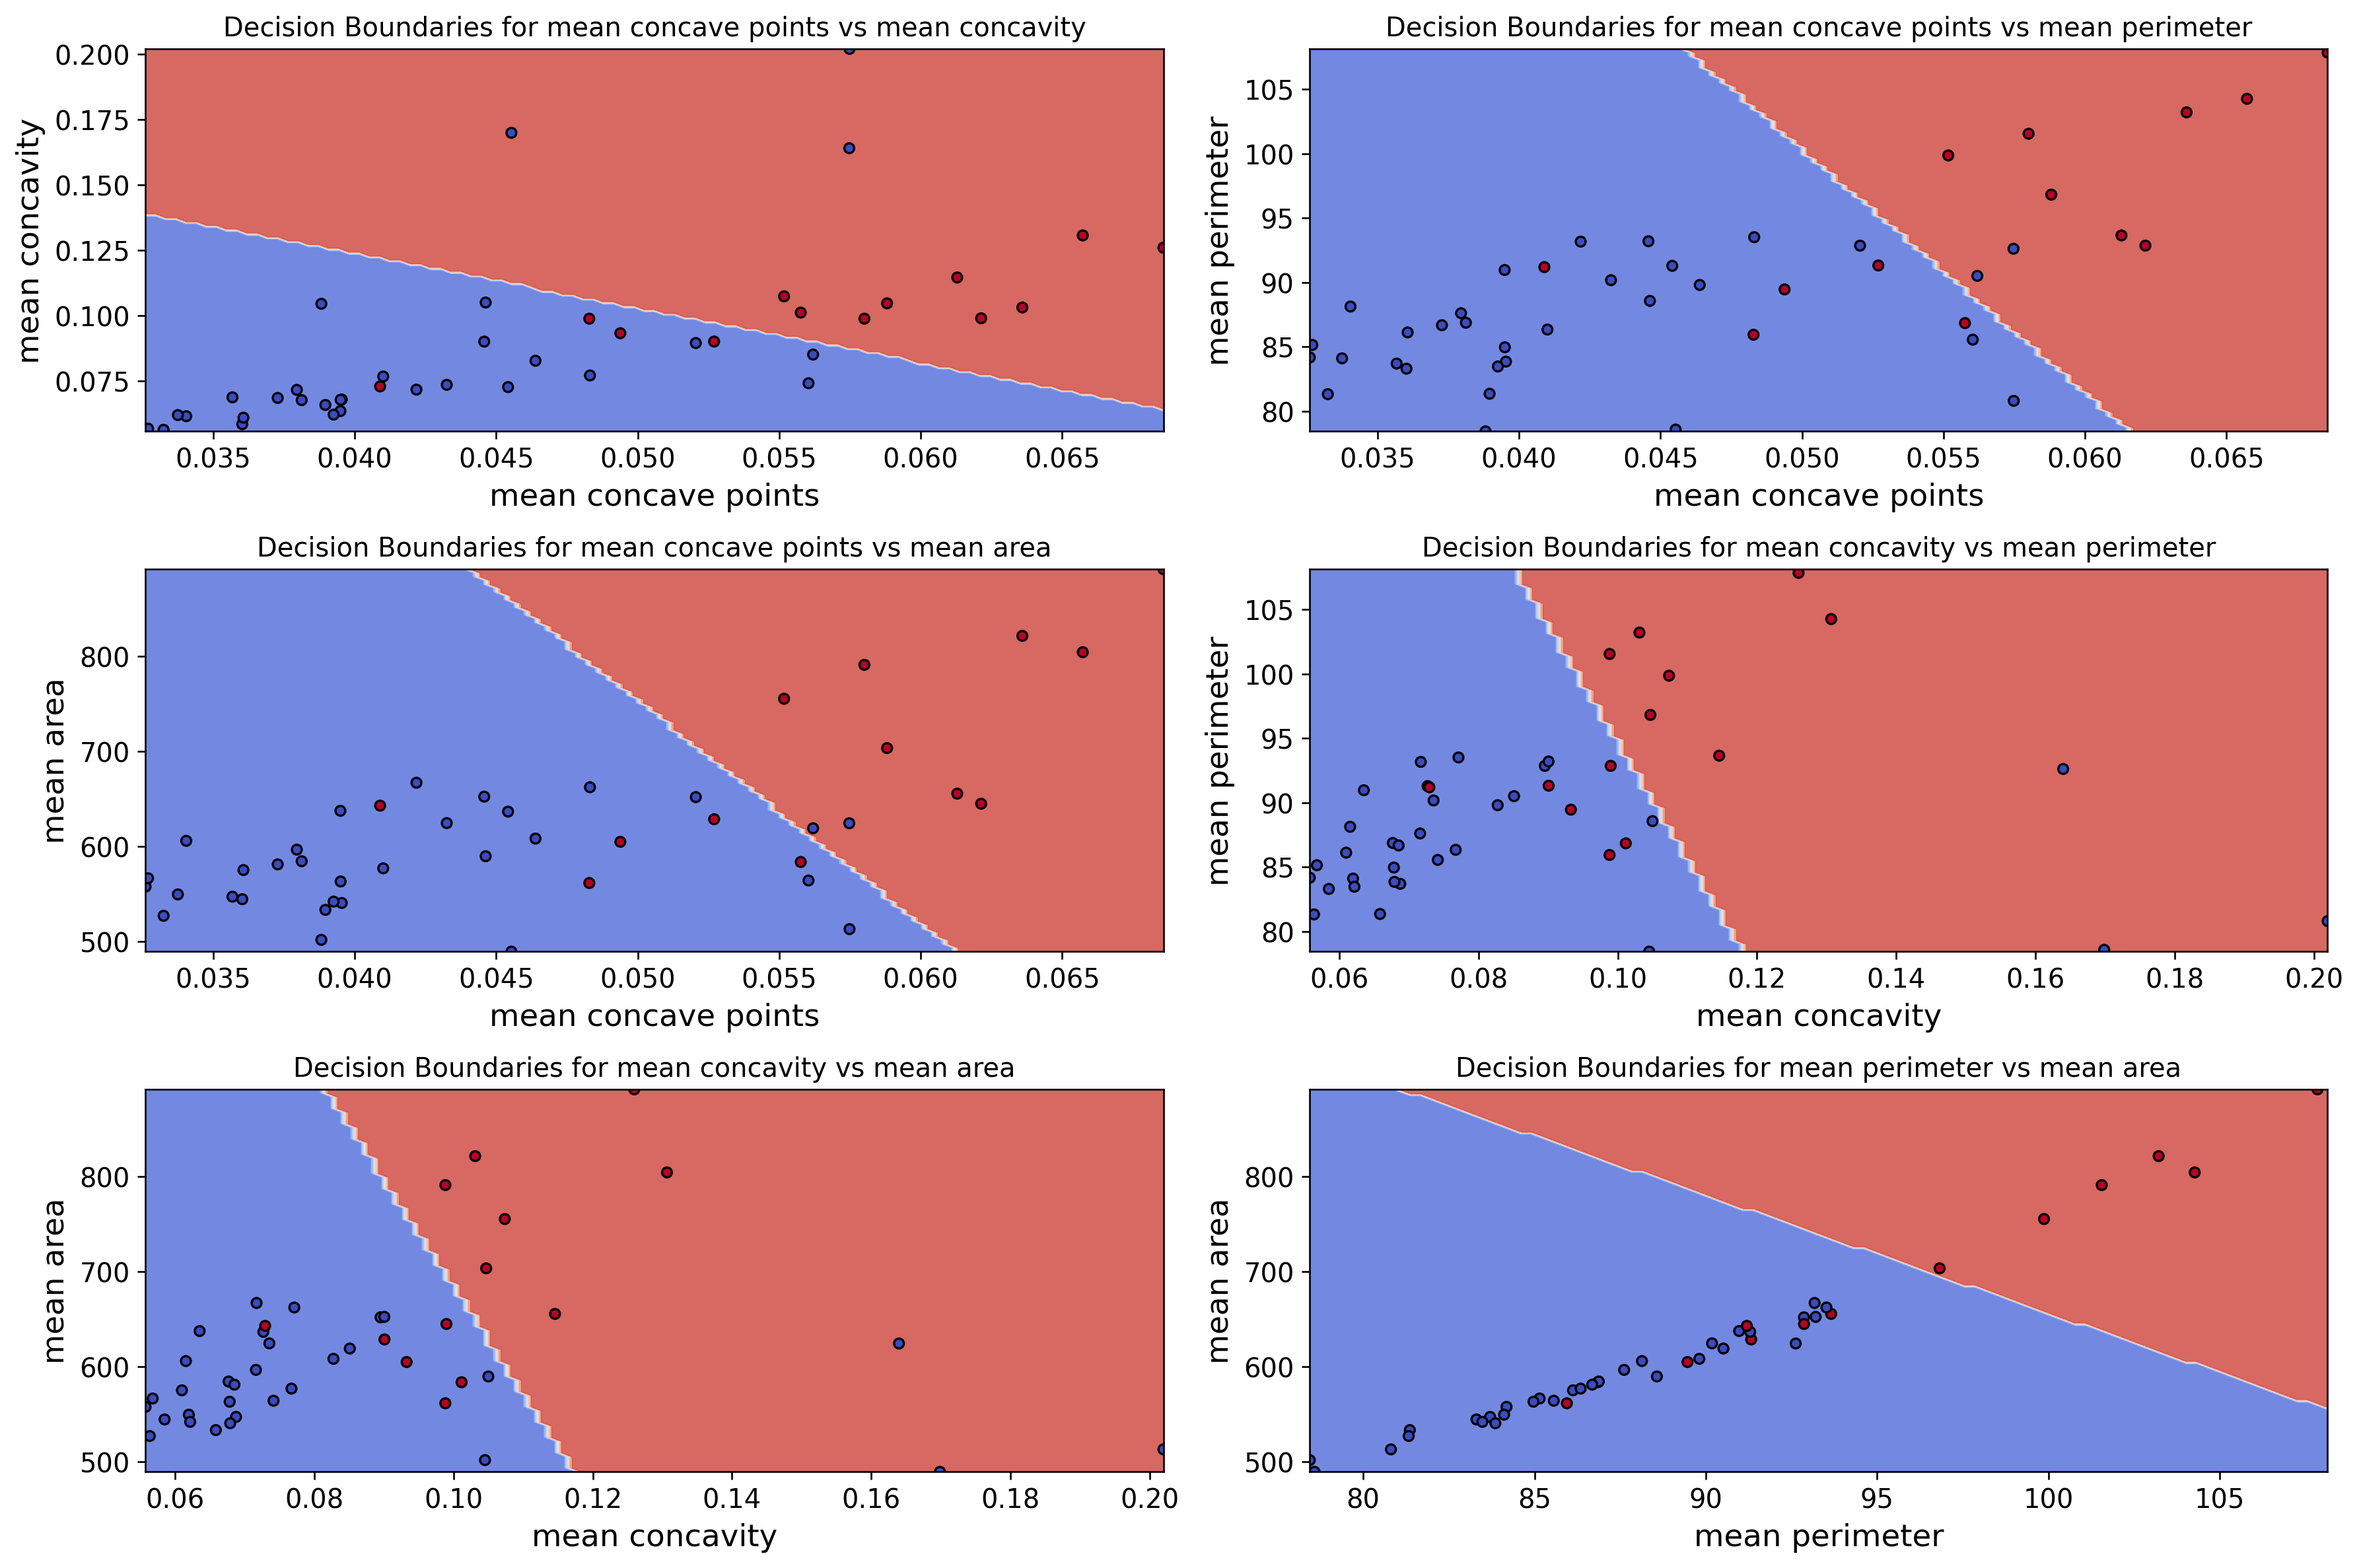

In [204]:
# Your code here


#Plot the decision boundaries based on validation set 
feature_names = ["mean concave points", "mean concavity", "mean perimeter", "mean area"]
feature_indices = [X_val.columns.get_loc(name) for name in feature_names]

# Prepare plots for each pair of features
feature_pairs = list(combinations(range(4), 2))  # This generates all unique pairs of indices (0,1), (0,2), etc.
plt.figure(figsize=(15, 10)) 

for index, (i, j) in enumerate(feature_pairs, 1):
    ax = plt.subplot(3, 2, index)
    n1, n2 = feature_indices[i], feature_indices[j]

    # Creating a meshgrid for the selected pair
    xx, yy = make_meshgrid(X_val.iloc[:, n1], X_val.iloc[:, n2])

    # Calculate class-specific means and adjust xmean for all features
    class_benign_mean = X_val[y_val == 0].mean()
    class_malignant_mean = X_val[y_val == 1].mean()
    xmean = 0.5 * (class_benign_mean + class_malignant_mean)  # Adjusted mean across all features

    # Plot decision boundaries
    plot_contours(svm_classifier_best, xx, yy, xmean.values, n1, n2, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_val.iloc[:, n1], X_val.iloc[:, n2], c=y_val, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel(feature_names[i]).set_fontsize(14)
    plt.ylabel(feature_names[j]).set_fontsize(14)
    plt.title(f"Decision Boundaries for {feature_names[i]} vs {feature_names[j]}")
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()



### 4.3 Performance specification
**Does the final model meet the client's criteria?  Explain why or why not.** [100 words maximum]

In [34]:
# Answer here

# The final model does not meet the client's criteria.
""" Although the best model, which is SVM classifier, has better performance than the baseline models on the validation set (AUC = 0.9 vs 0.87),
it is still not good enough for the client's requirements because the recall of the final model on the validation set is 0.85, which is less than the required 0.9.
It is not necessary to evaluate the model on the test set since the model does not meet the client's requirements on the validation set.
Therefore, the final model does not meet the criteria."""
